Choose how to provide vectors:
1. Enter vectors manually
2. Generate random vectors
Enter vectors in 2D space as space-separated numbers (e.g., '1 2'). Enter 'done' to finish:

Checking linear independence...
The rank of the matrix is: 2
The vectors are linearly independent.


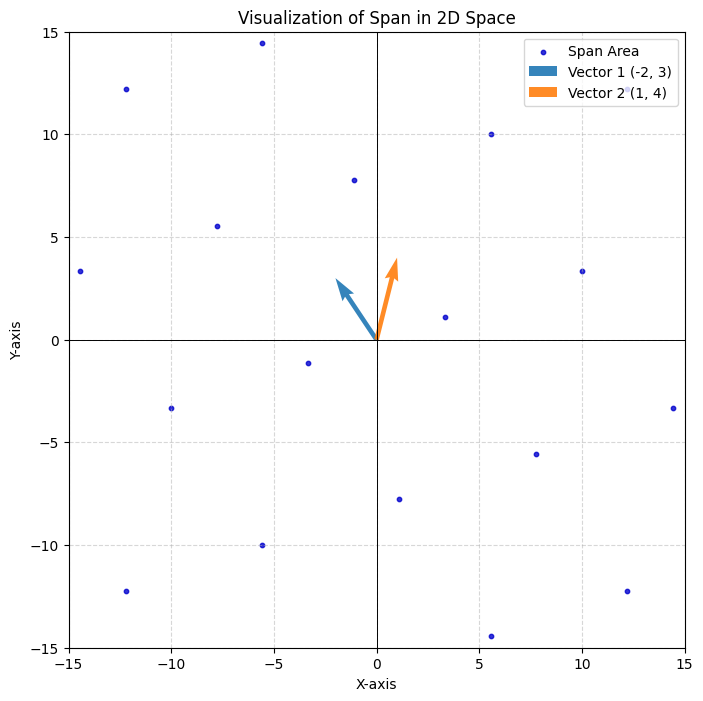


Finding the basis for the span...
Basis vectors:
[[-2  3]
 [ 1  4]]

Representing the vector as a linear combination...
The vector [-7. -6.] can be represented as:
2.00 * [-2  3] + -3.00 * [1 4]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def input_vectors():
    print("Choose how to provide vectors:")
    print("1. Enter vectors manually")
    print("2. Generate random vectors")
    choice = input("Enter your choice (1/2): ")

    if choice == "1":
        print("Enter vectors in 2D space as space-separated numbers (e.g., '1 2'). Enter 'done' to finish:")
        vectors = []
        while True:
            inp = input(f"Vector {len(vectors) + 1} (or 'done' to finish): ")
            if inp.lower() == "done":
                if len(vectors) >= 2:
                    break
                else:
                    print("Please enter at least two vectors.")
                    continue
            try:
                vector = list(map(int, inp.split()))
                if len(vector) != 2:
                    print("Please enter a valid 2D vector (two numbers).")
                else:
                    vectors.append(vector)
            except ValueError:
                print("Invalid input. Please enter space-separated integers.")
    elif choice == "2":
        num_vectors = int(input("How many random vectors do you want to generate? "))
        if num_vectors < 2:
            print("You must generate at least two vectors.")
            return None
        vectors = [np.random.randint(-10, 10, 2) for _ in range(num_vectors)]
        print(f"Generated vectors: {vectors}")
    else:
        print("Invalid choice. Exiting.")
        return None

    return np.array(vectors)

def check_independence(vectors):
    print("\nChecking linear independence...")
    matrix = np.stack(vectors, axis=1)
    rank = np.linalg.matrix_rank(matrix)
    print(f"The rank of the matrix is: {rank}")
    if rank == len(vectors[0]):
        print("The vectors are linearly independent.")
    else:
        print("The vectors are linearly dependent.")

def visualize_span(vectors, scale=10, points_per_axis=10):
    if len(vectors) != 2:
        print("Visualization currently supports only 2 vectors.")
        return

    vectors = [np.array(v) for v in vectors]

    scalars = np.linspace(-scale, scale, points_per_axis)
    span_points = []
    for s1 in scalars:
        for s2 in scalars:
            span_points.append(s1 * vectors[0] + s2 * vectors[1])
    span_points = np.array(span_points)

    plt.figure(figsize=(8, 8))

    plt.scatter(span_points[:, 0], span_points[:, 1], color='mediumblue', s=10, alpha=0.8, marker='o', label='Span Area')

    for i, vec in enumerate(vectors):
        plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1,
                   label=f"Vector {i+1} ({vec[0]}, {vec[1]})", color=f"C{i}", linewidth=2, alpha=0.9)

    plt.axhline(0, color='black', linewidth=0.7)
    plt.axvline(0, color='black', linewidth=0.7)
    plt.xlim(-scale * 1.5, scale * 1.5)
    plt.ylim(-scale * 1.5, scale * 1.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("Visualization of Span in 2D Space")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

def find_basis(vectors):
    print("\nFinding the basis for the span...")
    independent_vectors = []
    for i in range(len(vectors)):
        candidate_basis = independent_vectors + [vectors[i]]
        if np.linalg.matrix_rank(np.column_stack(candidate_basis)) > len(independent_vectors):
            independent_vectors.append(vectors[i])
    basis = np.array(independent_vectors)
    print(f"Basis vectors:\n{basis}")
    return basis

def represent_vector_as_linear_combination(vectors):
    print("\nRepresenting the vector as a linear combination...")
    
    matrix = np.column_stack(vectors)
    result_vector = np.array(list(map(int, input("Enter the resultant vector (space-separated numbers): ").split())), dtype=float)
    result_vector = result_vector.reshape(-1, 1)
    
    try:
        coefficients = np.linalg.solve(matrix, result_vector)
        print(f"The vector {result_vector.flatten()} can be represented as:")
        print(" + ".join(
            f"{coefficients[i][0]:.2f} * {vectors[i]}" for i in range(len(vectors))
        ))
    except np.linalg.LinAlgError as e:
        print("The vector cannot be represented as a linear combination of the given vectors.")
        print(f"Reason: {e}")


if __name__ == "__main__":
    # Input vectors
    vectors = input_vectors()
    if vectors is None:
        exit()

    # Check linear independence
    check_independence(vectors)

    # Visualize the span of the vectors
    visualize_span(vectors)

    # Find the basis of the span
    find_basis(vectors)

    # Represent a result vector as a linear combination
    represent_vector_as_linear_combination(vectors)